In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loandataset/Bank_Personal_Loan_Modelling.csv


In [2]:
data = pd.read_csv('../input/loandataset/Bank_Personal_Loan_Modelling.csv')

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.shape

(5000, 14)

<h5>Data has 5000 entries</h5>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# Cleaning data

In [7]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<h3>All the rows are filled no null values appear 
     Safe to say that data has no missing values</h3>

In [9]:
data = data.drop(['ID','ZIP Code'], axis=1)

<h3>There is no missing value or categorical data</h3>

In [10]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


Relation of Age and Expirence is very high.<br>
There is a positive correlation of income and ccavg.<br>
Income and Personal Loan are also in good positive correlation

In [11]:
data.corr()['Personal Loan']

Age                  -0.007726
Experience           -0.007413
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

<h3>Persons Income, CCAvg, Mortage and CD Account are showing good correlation with Personal Loan then other factors</h3>
<h4>Age, Experience are showing strong correlation with each other but are negatively correlated with Personal Loan</h4>

In [12]:
#Starting with Visualization


<Figure size 1440x864 with 0 Axes>

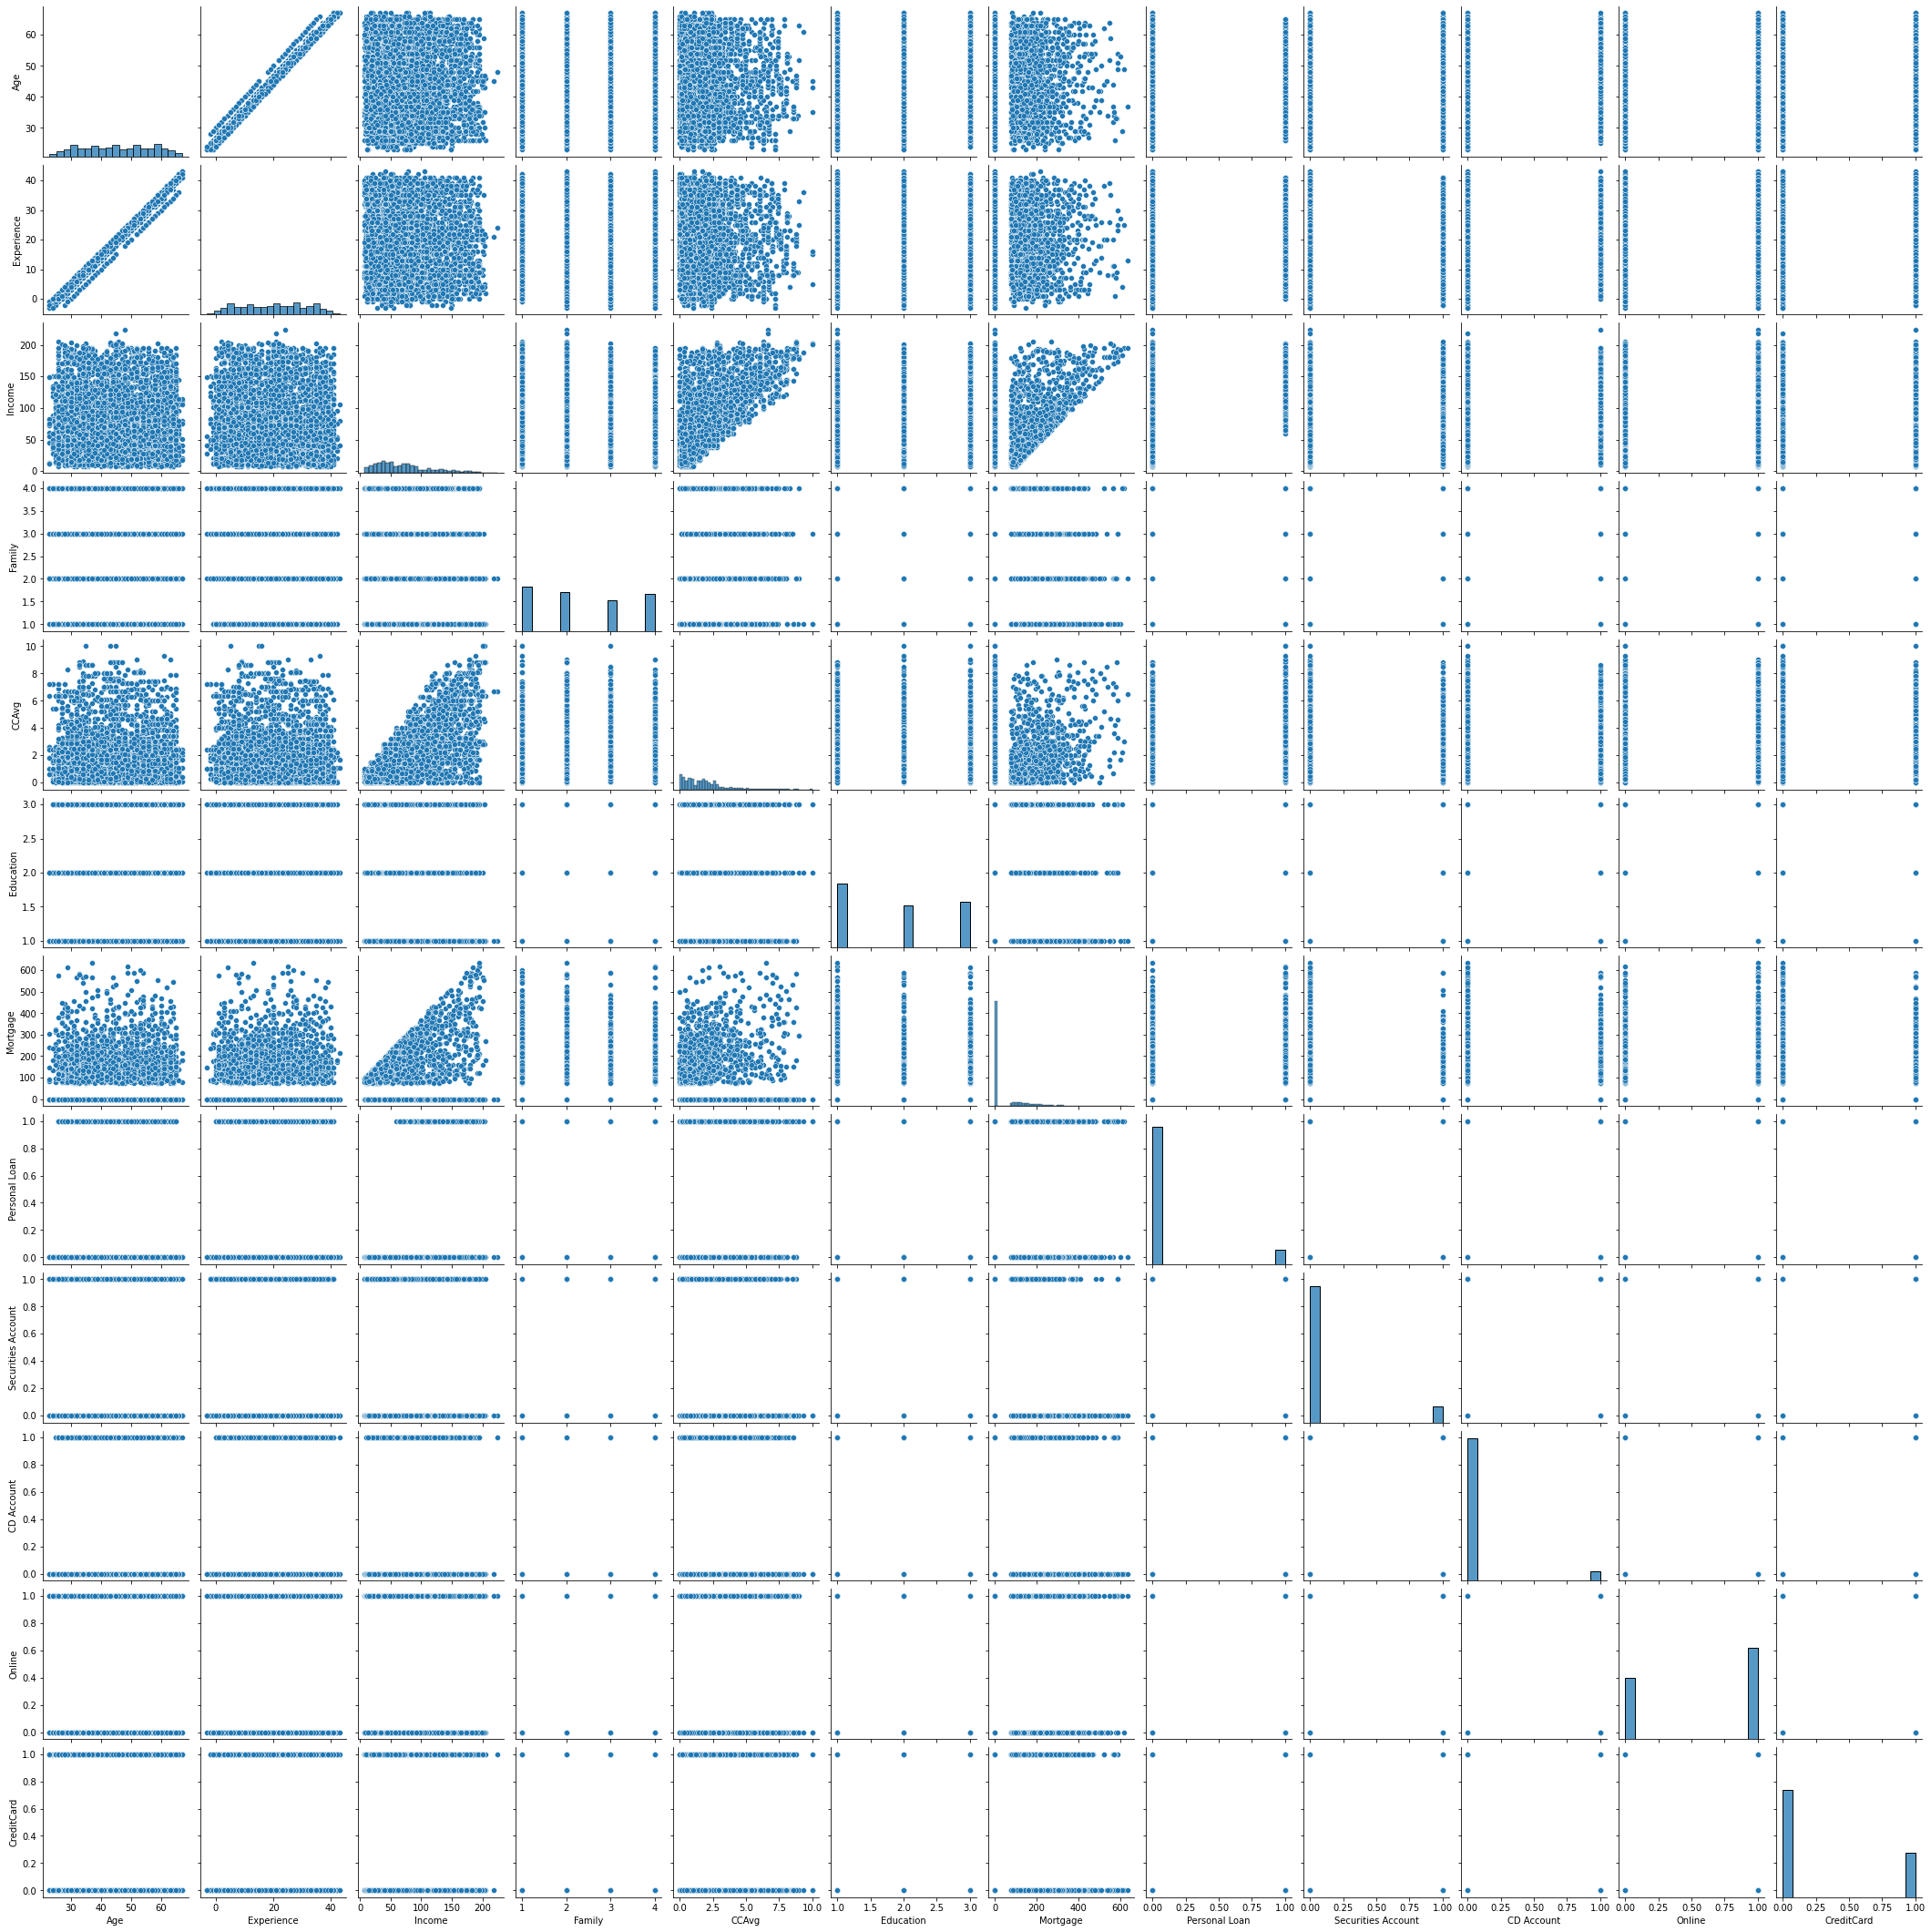

In [13]:
plt.figure(figsize=(20,12))
sns.pairplot(data)
plt.show()

In [14]:
def summary(x):
    small = data[x].min()
    large = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print('5 Number Summary of {} Attribute:\n'.format(x))
    print('{}(min)          : {}\n'.format(x, small))
    print('Q1                    : {}\n'.format(Q1))
    print('Q2(Median)            : {}\n'.format(Q2))
    print('Q3                    : {}\n'.format(Q3))
    print('{}(max)          : {}\n'.format(x,large))

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    
    
    plt.subplot(221)
    ax1 = sns.histplot(data[x], kde= False)
    plt.title('{} Histogram'.format(x))
    
    plt.subplot(222)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title('{} Boxplot'.format(x))
    
    plt.subplot(223)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title('{} Cumulative Density Distribution'.format(x))
    
    plt.subplot(224)
    ax4 = sns.kdeplot(data[x], shade= True)
    plt.title('{} Density plot'.format(x))
    
    plt.show()

5 Number Summary of Age Attribute:

Age(min)          : 23

Q1                    : 35.0

Q2(Median)            : 45.0

Q3                    : 55.0

Age(max)          : 67



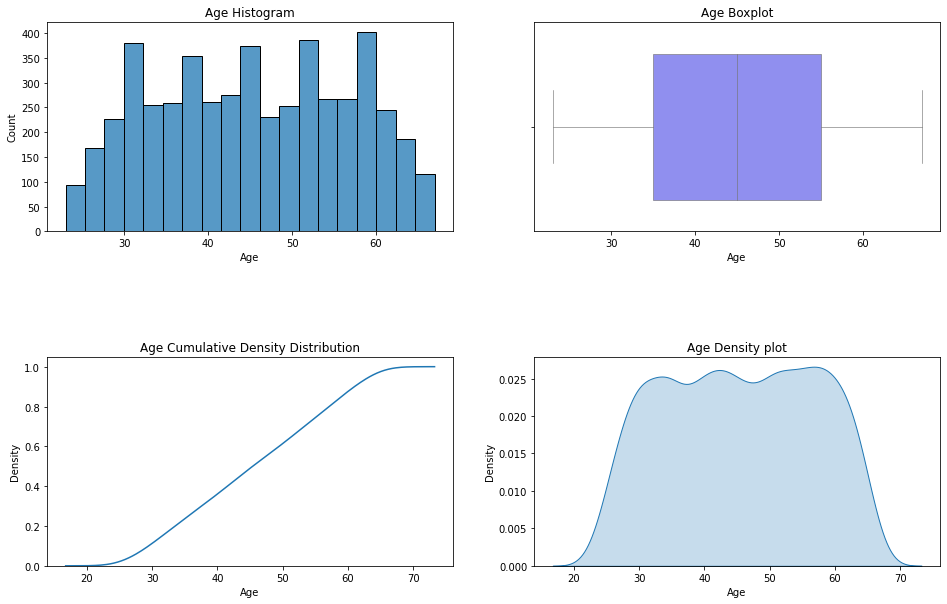

In [15]:
summary('Age')

5 Number Summary of Experience Attribute:

Experience(min)          : -3

Q1                    : 10.0

Q2(Median)            : 20.0

Q3                    : 30.0

Experience(max)          : 43



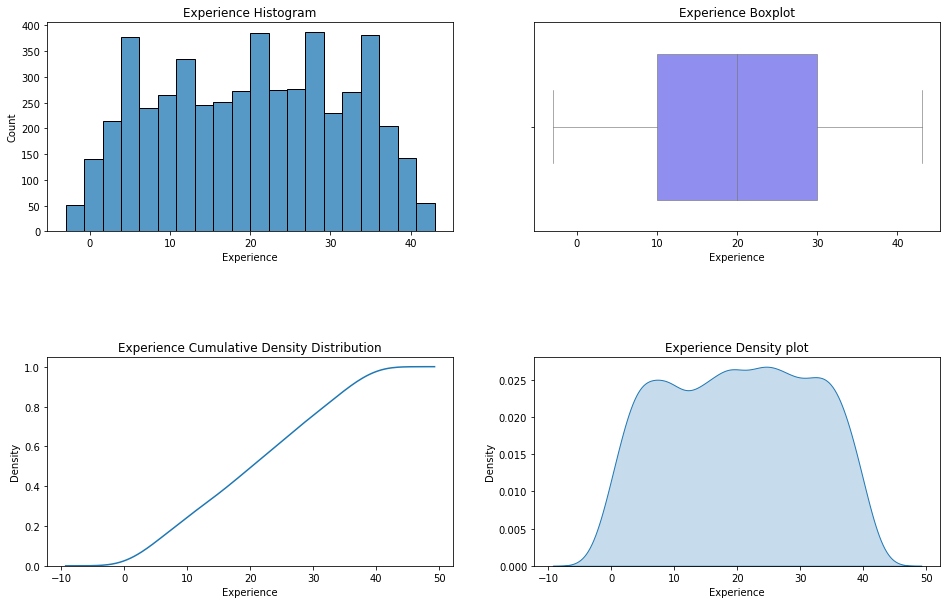

In [16]:
summary('Experience')  

5 Number Summary of Income Attribute:

Income(min)          : 8

Q1                    : 39.0

Q2(Median)            : 64.0

Q3                    : 98.0

Income(max)          : 224



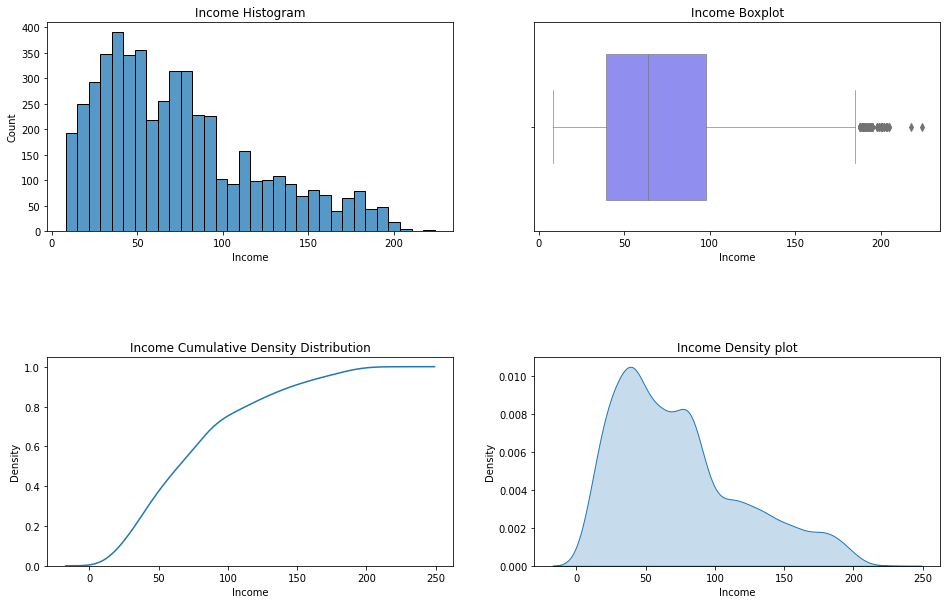

In [17]:
summary('Income')

<h3>Income has a lot of outliers</h3>
<h3>The data is left Skewed</h3>

In [18]:
def outlier(x):
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3-Q1
    outliers = data[x][((data[x]<(Q1-1.5*IQR)) | (data[x]>(Q3+1.5*IQR)))]
    return outliers
outlier('Income')

18      193
47      194
53      190
59      188
303     195
       ... 
4659    199
4670    194
4895    201
4981    195
4993    218
Name: Income, Length: 96, dtype: int64

<h3>96 outliers in income not much we can try building model</h3>

5 Number Summary of Family Attribute:

Family(min)          : 1

Q1                    : 1.0

Q2(Median)            : 2.0

Q3                    : 3.0

Family(max)          : 4



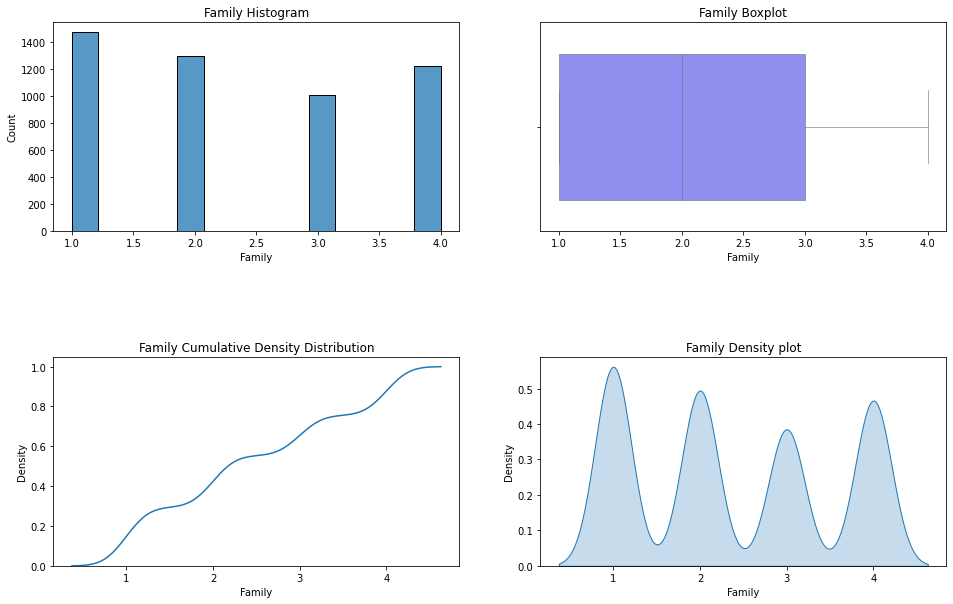

In [19]:
summary('Family')

5 Number Summary of CCAvg Attribute:

CCAvg(min)          : 0.0

Q1                    : 0.7

Q2(Median)            : 1.5

Q3                    : 2.5

CCAvg(max)          : 10.0



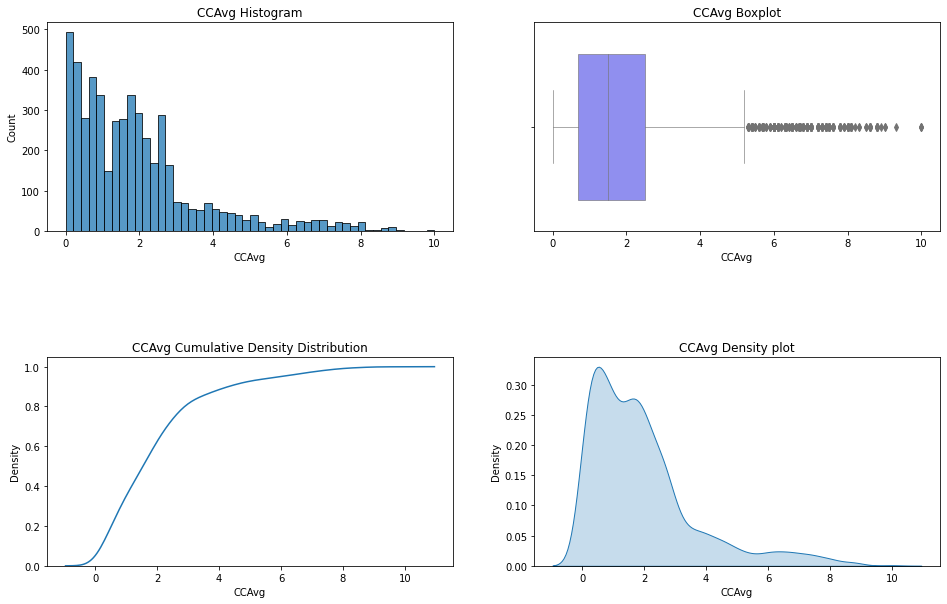

In [20]:
summary('CCAvg')

In [21]:
outlier('CCAvg')

9       8.90
18      8.10
44      5.70
55      8.00
61      5.70
        ... 
4908    6.10
4911    7.50
4937    8.60
4980    5.30
4993    6.67
Name: CCAvg, Length: 324, dtype: float64

<h3>We see that the Average Monthly Credit Card spending of the customers are skewed heavily to the left, with 324 values outlier values</h3>

5 Number Summary of Education Attribute:

Education(min)          : 1

Q1                    : 1.0

Q2(Median)            : 2.0

Q3                    : 3.0

Education(max)          : 3



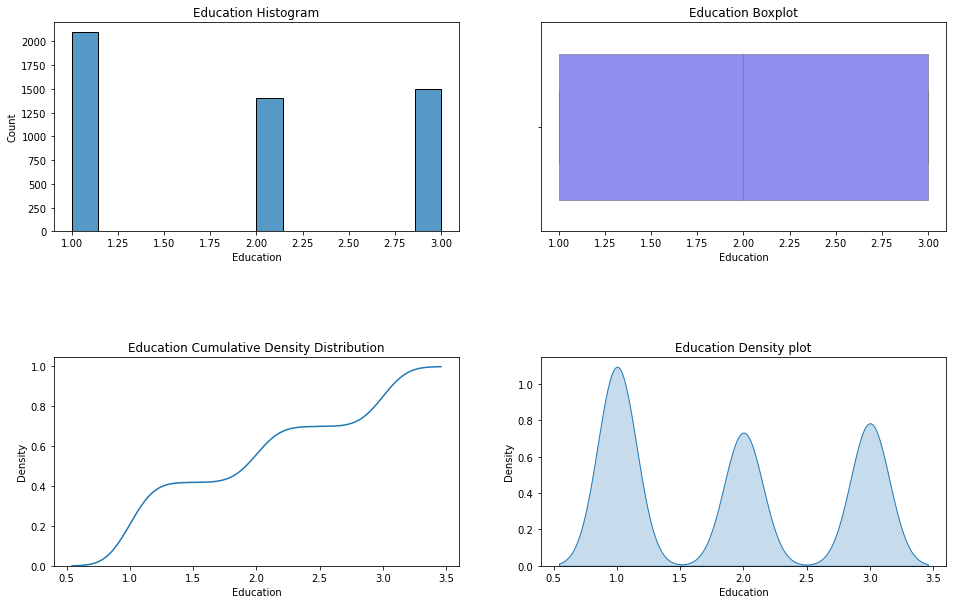

In [22]:
summary('Education')

5 Number Summary of Mortgage Attribute:

Mortgage(min)          : 0

Q1                    : 0.0

Q2(Median)            : 0.0

Q3                    : 101.0

Mortgage(max)          : 635



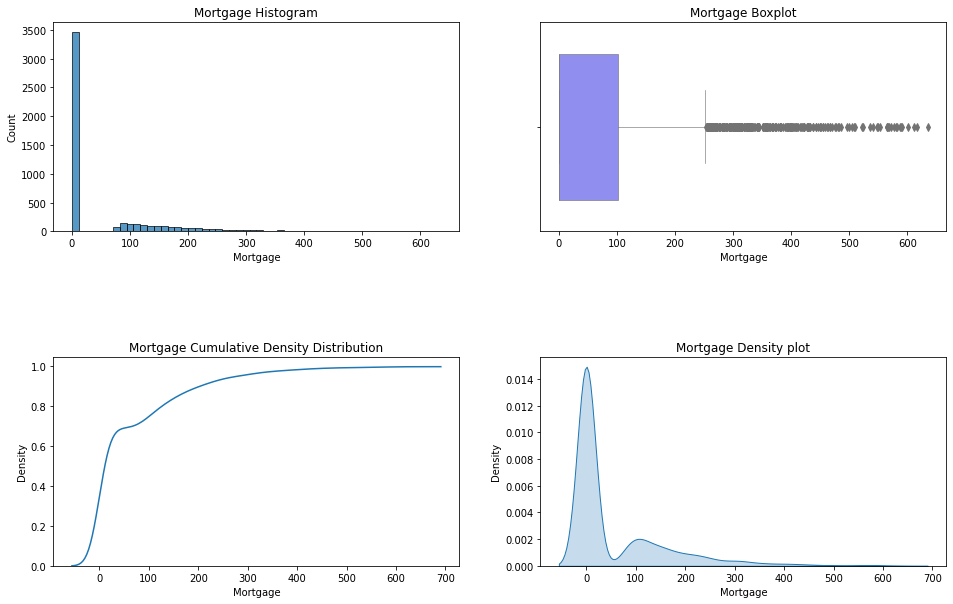

In [23]:
summary('Mortgage')

In [24]:
outlier('Mortgage')

22      260
39      285
42      412
59      455
66      336
       ... 
4859    541
4865    342
4899    299
4942    308
4963    306
Name: Mortgage, Length: 291, dtype: int64

<h3>The Mortgage is complete left skewed. It has 291 values as outliers
</h3>

5 Number Summary of Securities Account Attribute:

Securities Account(min)          : 0

Q1                    : 0.0

Q2(Median)            : 0.0

Q3                    : 0.0

Securities Account(max)          : 1



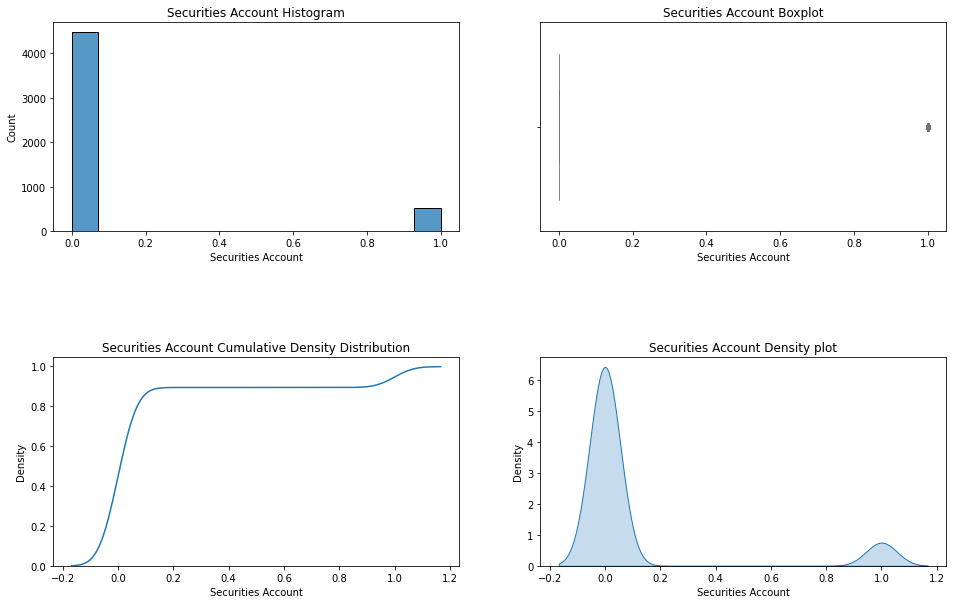

In [25]:
summary('Securities Account')

<h3>A left Skew is observed here as well</h3

5 Number Summary of CD Account Attribute:

CD Account(min)          : 0

Q1                    : 0.0

Q2(Median)            : 0.0

Q3                    : 0.0

CD Account(max)          : 1



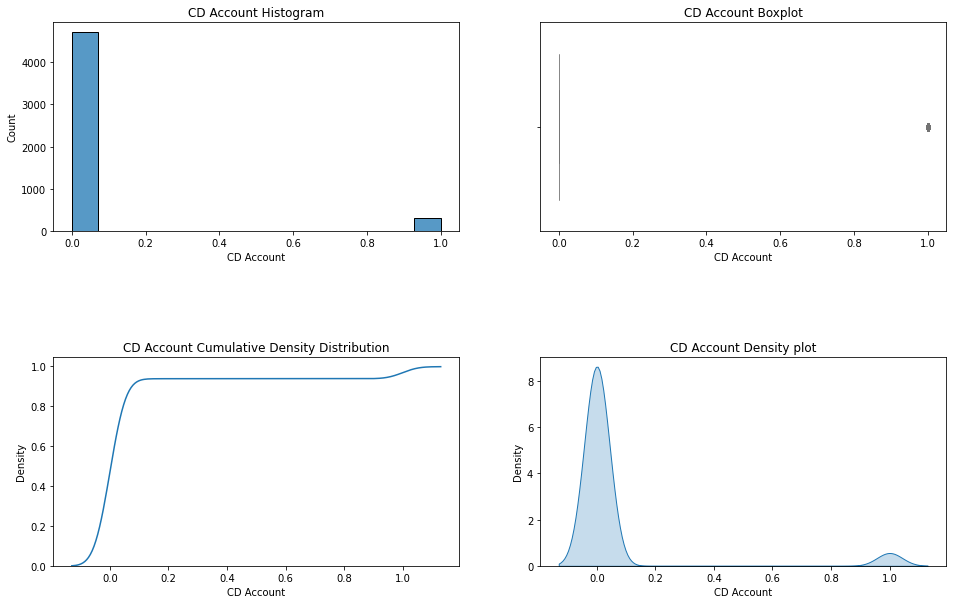

In [26]:
summary('CD Account')

<h3>This data has 1 and 0 as inputs might be a consider as categorical. Left skew and an even distribution</h3

5 Number Summary of CD Account Attribute:

CD Account(min)          : 0

Q1                    : 0.0

Q2(Median)            : 0.0

Q3                    : 0.0

CD Account(max)          : 1



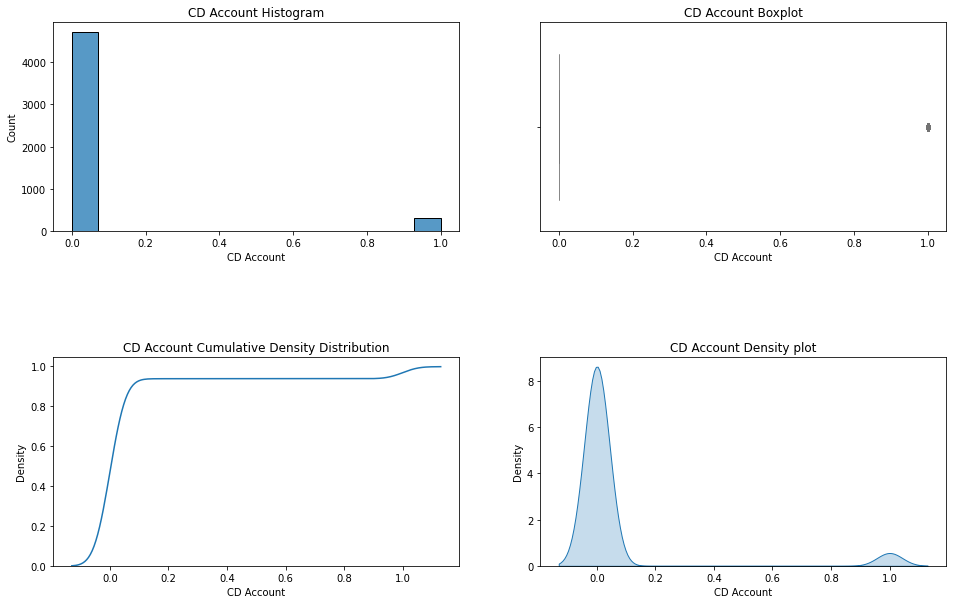

In [27]:
summary('CD Account')

5 Number Summary of Online Attribute:

Online(min)          : 0

Q1                    : 0.0

Q2(Median)            : 1.0

Q3                    : 1.0

Online(max)          : 1



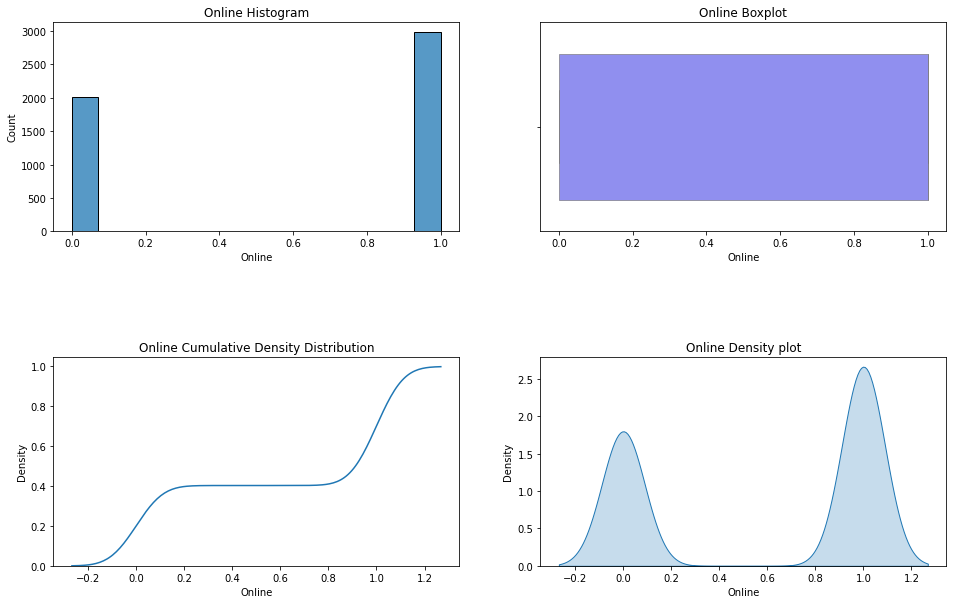

In [28]:
summary('Online')

5 Number Summary of CreditCard Attribute:

CreditCard(min)          : 0

Q1                    : 0.0

Q2(Median)            : 0.0

Q3                    : 1.0

CreditCard(max)          : 1



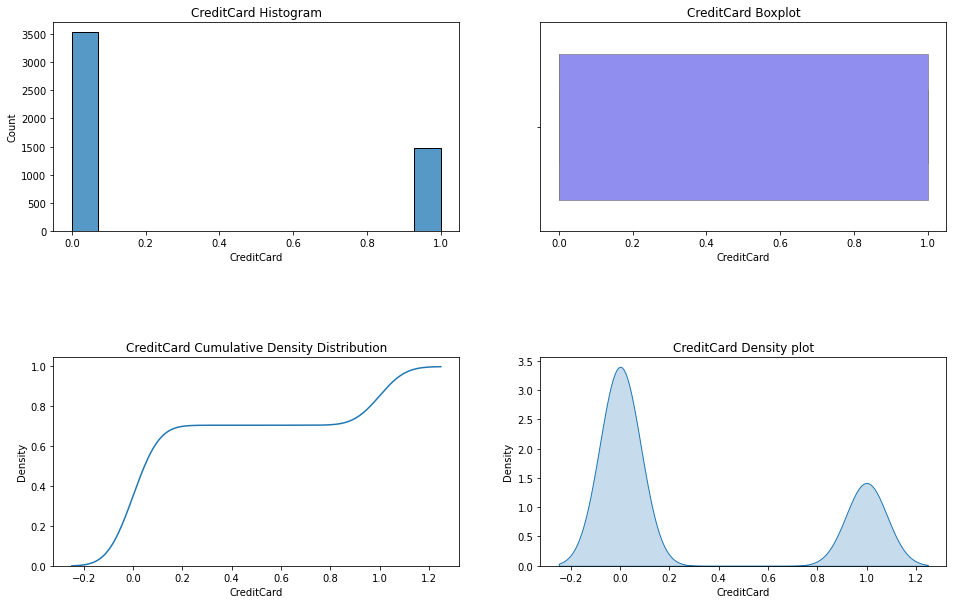

In [29]:
summary('CreditCard')

There are attribute which have only 1's and 0's in them which can be considered as categorical data as 1 as yes and 0 as a no 
CD Account Online CreditCard Securities Account are these attributes

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

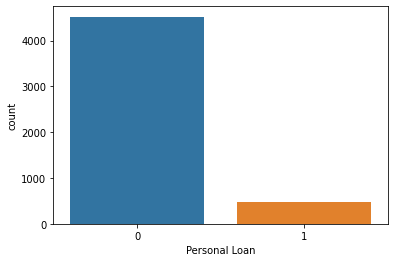

In [30]:
sns.countplot(x = 'Personal Loan', data = data)

In [31]:
# Data Splitting
x = data.drop('Personal Loan', axis= 1)
y = data['Personal Loan']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [33]:
# using logistic regression

In [34]:
model = LogisticRegression(solver= 'liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [35]:
y_pred = model.predict(x_test)

In [36]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [37]:
model_score = model.score(x_test, y_test)

In [38]:
print(model_score)

0.9453333333333334


LOgistic regression model gives score 94.5%

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ps = precision_score(y_test, y_pred)

In [40]:
print(cm)
print('Accuracy Score', ac)
print('Precision Score', ps)

[[1333   18]
 [  64   85]]
Accuracy Score 0.9453333333333334
Precision Score 0.8252427184466019


In [41]:
x1 = data.drop(['Personal Loan','Age', 'Experience', 'Securities Account', 'Online'], axis= 1)
y1 = data['Personal Loan']

In [42]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30, random_state=1)

In [43]:
model = LogisticRegression(solver= 'liblinear')
model.fit(x1_train,y1_train)

LogisticRegression(solver='liblinear')

In [44]:
y1_pred = model.predict(x1_test)
print(y1_pred)

[0 0 0 ... 0 0 0]


In [45]:
print('cm',confusion_matrix(y1_test, y1_pred))
print('Accuracy',accuracy_score(y1_test,y1_pred))
print('precison',precision_score(y1_test, y1_pred))


cm [[1341   10]
 [  71   78]]
Accuracy 0.946
precison 0.8863636363636364


Even when we reduce the attribute taken in consideration the accuracy score is not showing much improvement but precision score is showing a better result

In [46]:
#KNN modeling

In [47]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x1_train,y1_train)
y1_pred = knn.predict(x1_test)


In [48]:
print(y1_pred)

[0 0 0 ... 0 0 0]


In [49]:
print('cm',confusion_matrix(y1_test, y1_pred))
print('Accuracy',accuracy_score(y1_test,y1_pred))
print('precison',precision_score(y1_test, y1_pred))


cm [[1313   38]
 [  88   61]]
Accuracy 0.916
precison 0.6161616161616161


Accuracy of the KNN model is 91.6%

In [50]:
# Gussian NAvie Bayes

In [51]:
nb_model = GaussianNB()
nb_model.fit(x1_train, y1_train)

nb_predict = nb_model.predict(x1_test)


In [52]:
print(nb_predict)

[0 0 0 ... 0 0 0]


In [53]:
print('Accuracy of gaussian NB', nb_model.score(x1_test, y1_test))

Accuracy of gaussian NB 0.874


In [54]:
print('cm',confusion_matrix(y1_test, nb_predict))
print('Accuracy',accuracy_score(y1_test,nb_predict))
print('precison',precision_score(y1_test, nb_predict))


cm [[1227  124]
 [  65   84]]
Accuracy 0.874
precison 0.40384615384615385


Gussian NB Accuracy is 87.4%

In [55]:
# Which model is better suited

kNN model is good suited Accuracy is higher than the other 2 <br>
Even precision score is acceptable with KNN model<br>
True positive score is 1313<br>
False positive is 38<br>
For KNN model